Original Euclidean Distance: 0.66
Smoothed Euclidean Distance (4-MA): 0.66


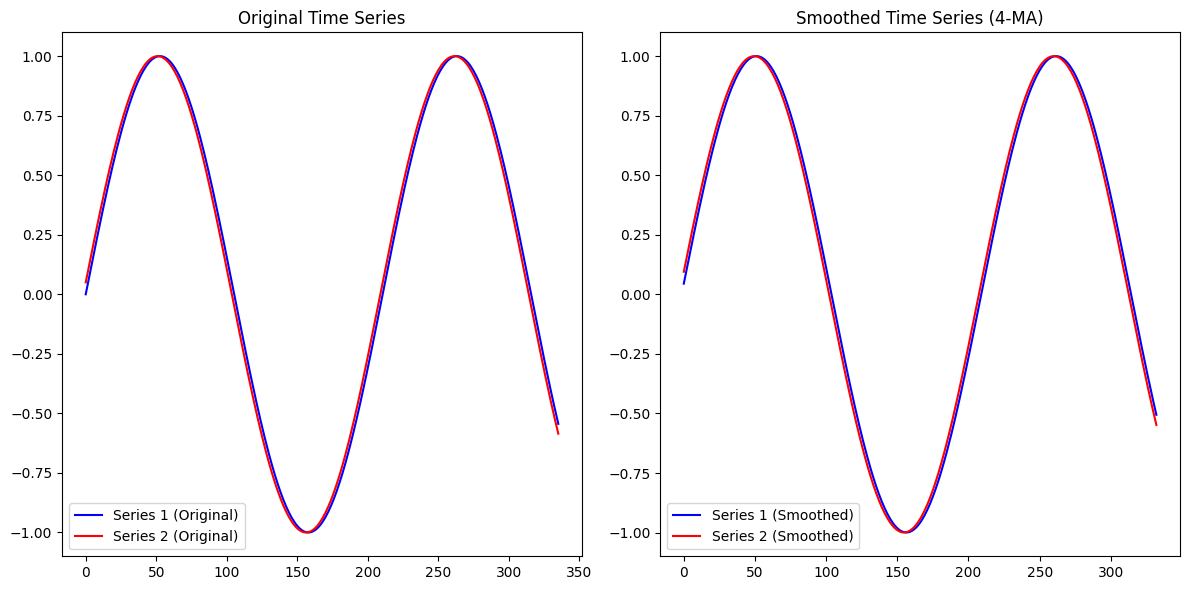

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义K阶移动平均函数
def k_ma(sequence, k):
    return np.convolve(sequence, np.ones(k)/k, mode='valid')

# 2. 生成两条相似但欧几里得距离较大的时间序列
def generate_time_series(length=336):
    t = np.linspace(0, 10, length)
    noise = np.random.normal(0, 0.1, length)
    m_noise = 0.1 - noise
    series_1 = np.sin(t) + noise  # 带噪声的正弦波
    series_2 = np.sin(t + 0.05) + m_noise  # 带噪声的正弦波（相位不同）
    return series_1, series_2

# 3. 计算欧几里得距离
def euclidean_distance(seq1, seq2):
    return np.sqrt(np.sum((seq1 - seq2) ** 2))

# 4. 绘制图形以便直观比较
def plot_series(original1, original2, smoothed1, smoothed2):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(original1, label="Series 1 (Original)", color='b')
    plt.plot(original2, label="Series 2 (Original)", color='r')
    plt.title("Original Time Series")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(smoothed1, label="Series 1 (Smoothed)", color='b')
    plt.plot(smoothed2, label="Series 2 (Smoothed)", color='r')
    plt.title("Smoothed Time Series (4-MA)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# 5. 主程序
if __name__ == "__main__":
    # 生成两条时间序列
    series_1, series_2 = generate_time_series()

    # 计算原始时间序列的欧几里得距离
    original_distance = euclidean_distance(series_1, series_2)
    print(f"Original Euclidean Distance: {original_distance:.2f}")

    # 使用4-MA进行平滑
    smoothed_1 = k_ma(series_1, 4)
    smoothed_2 = k_ma(series_2, 4)

    # 计算平滑后的欧几里得距离
    smoothed_distance = euclidean_distance(smoothed_1, smoothed_2)
    print(f"Smoothed Euclidean Distance (4-MA): {smoothed_distance:.2f}")

    # 绘制结果
    plot_series(series_1, series_2, smoothed_1, smoothed_2)
